## Create Mask from annotations

In [19]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [20]:
import os
import json
import random
from PIL import Image
import PIL.ImageDraw as ImageDraw
from tqdm import tqdm
import numpy as np
from PIL import ImageOps
import matplotlib.pyplot as plt
import tqdm

%matplotlib inline

In [21]:
from pathlib import Path

ROOT = Path(os.getcwd())
DATE = "settembre_2020"


images_path = ROOT / "images_original" / DATE
annotations_path = ROOT / "annotations" / DATE

In [22]:
def create_mask(fname):
    case = os.path.splitext(fname)[0]

    IMG = Image.open(images_path / f"{case}.jpg")
    with open(annotations_path / f"{case}.json", "r") as f:
        data = json.load(f)

    mask = Image.fromarray(np.zeros_like(np.array(IMG))).convert("1")

    draw = ImageDraw.Draw(mask)

    for i in range(len(data)):
        annot = data[i]["points"]
        anns = tuple([tuple(i) for i in annot])
        draw.polygon(anns, fill="white")

    return mask


def show_mask(fname):
    mask = create_mask(fname)
    case = os.path.splitext(fname)[0]

    plt.figure(figsize=(20, 22))
    plt.subplot(1, 2, 1)
    plt.imshow(Image.open(images_path / f"{case}.jpg"))
    plt.title(f"{case}", fontsize=20)
    plt.subplot(1, 2, 2)
    plt.imshow(mask)

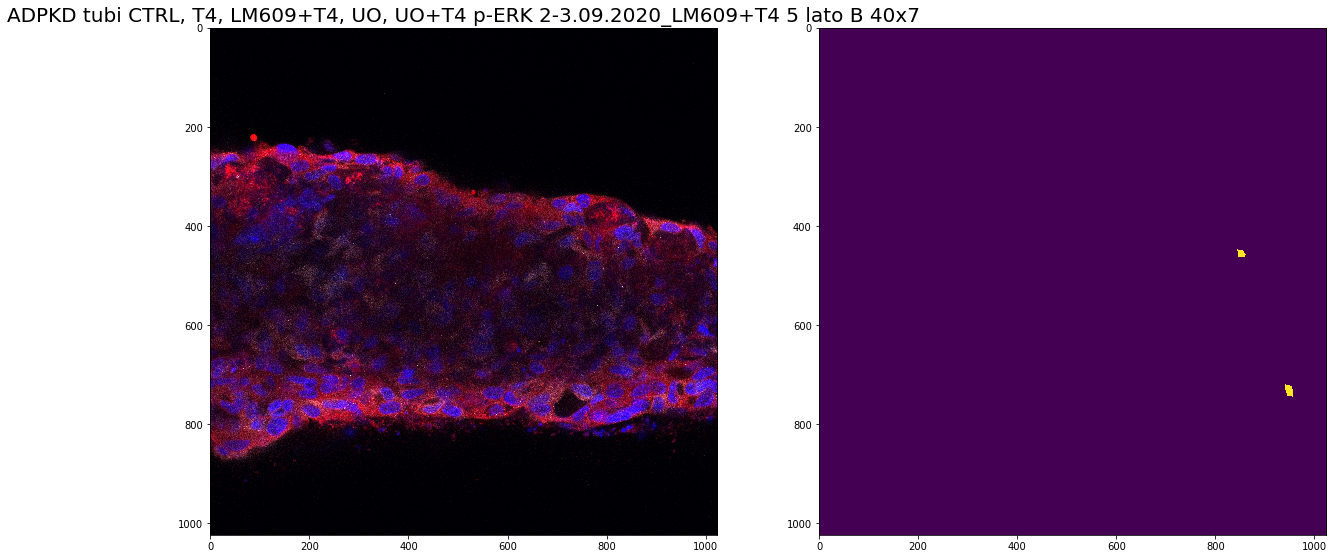

In [23]:
np.random.seed(42)


index = random.randint(0, len(os.listdir(images_path)) - 1)

show_mask(os.listdir(images_path)[index])

# Save masks

In [24]:
MASK_PATH = ROOT / "masks" / DATE
os.makedirs(MASK_PATH, exist_ok=True)

for img in os.listdir(images_path):
    if img.endswith("jpg"):
        case = os.path.splitext(img)[0]

        mask = create_mask(img)
        mask.save(MASK_PATH / f"{case}_mask.png")